In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Load the dataset
data = pd.read_csv('heart.csv')


In [ ]:
#DATA CLEANING
# Remove rows where Cholesterol is 0
data = data[data['Cholesterol'] != 0]  # Treat Cholesterol = 0 as missing and remove these rows

# Remove rows where RestingBP is  0
data = data[data['RestingBP'] != 0]
print(f"Dataset after removing rows with Cholesterol = 0 and RestingBP = 0: {data.shape}")

# Display the original dataset before one-hot encoding
print(data[['ChestPainType']].head())

# Convert categorical columns to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Display the transformed dataset with encoded columns
print(data_encoded[['ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA']].head())

Dataset after removing rows with Cholesterol = 0 and RestingBP = 0: (746, 12)
  ChestPainType
0           ATA
1           NAP
2           ATA
3           ASY
4           NAP
   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA
0               True              False             False
1              False               True             False
2               True              False             False
3              False              False             False
4              False               True             False


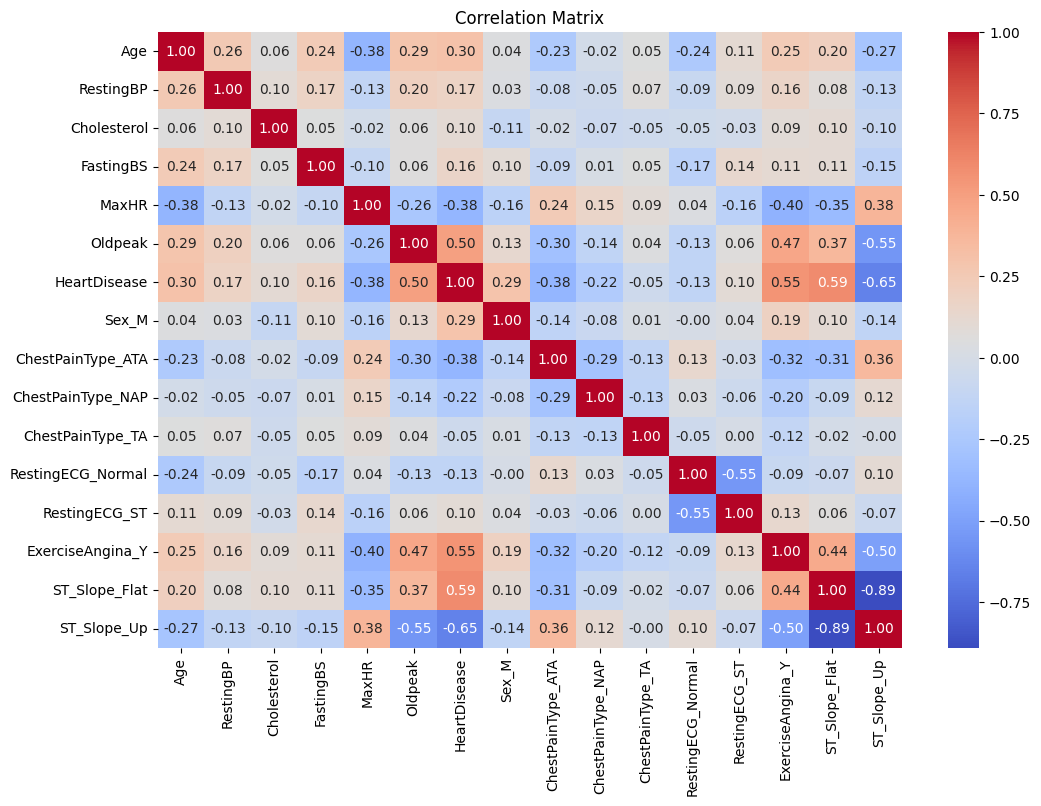

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age         

In [ ]:
# DATA ANALYSIS
# Compute the correlation matrix with encoded data
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Basic inspection
print(data.head())
print(data.info())
print(data.describe())

Base Logistic Regression Evaluation:
Accuracy: 0.89
Precision: 0.93
Recall: 0.86
F1 Score: 0.89
AUC Score: 0.96


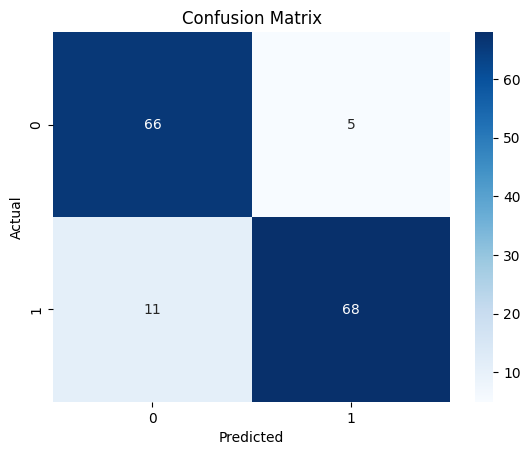

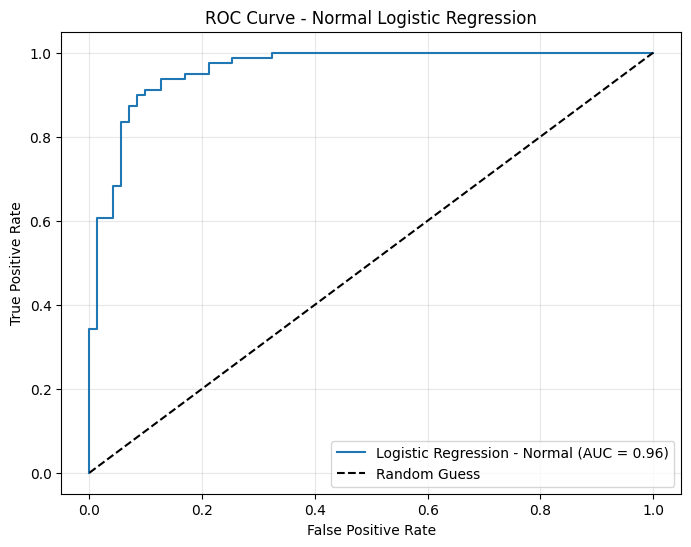

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
225 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File 

Best Parameters for Logistic Regression:
{'C': 0.01, 'l1_ratio': 0.2, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Tuned Logistic Regression Evaluation:
Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1 Score: 0.90
AUC Score: 0.96


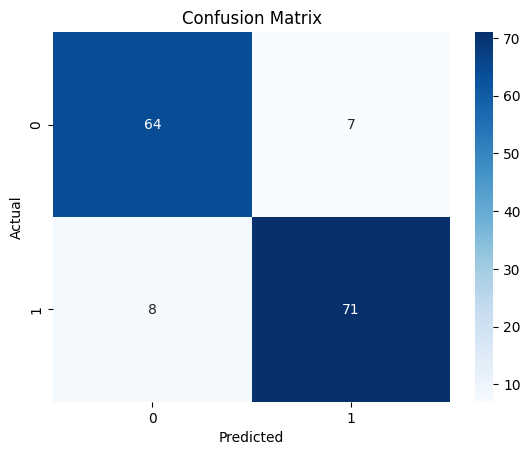

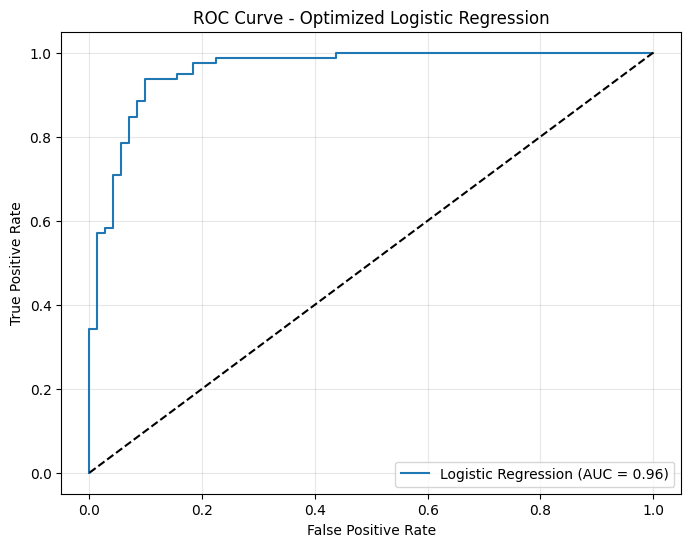

In [ ]:
#LOGISTIC REGRESSION MODEL
# Preprocess the data: Encode categorical variables and scale features
X = pd.get_dummies(data.drop(columns=['HeartDisease']), drop_first=True)  # Features excluding target
y = data['HeartDisease']  # Target variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initial Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Evaluate the initial Logistic Regression model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"AUC Score: {auc:.2f}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Evaluate the base logistic regression model
print("Base Logistic Regression Evaluation:")
evaluate_model(log_reg, X_test, y_test)

# Generate the ROC curve for the baseline logistic regression model
y_pred_proba_base = log_reg.predict_proba(X_test)[:, 1]  # Predicted probabilities for the baseline model
fpr_base, tpr_base, _ = roc_curve(y_test, y_pred_proba_base)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_base, tpr_base, label=f"Logistic Regression - Normal (AUC = {roc_auc_score(y_test, y_pred_proba_base):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")  # Random guessing line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Normal Logistic Regression")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularisation type
    'C': [0.01, 0.1, 1, 10, 100],  # Regularisation strength
    'solver': ['liblinear', 'saga'],  # Solvers that support l1 and elasticnet
    'max_iter': [100, 200, 500],  # Maximum iterations
    'l1_ratio': [0.2, 0.5, 0.8]  # Only used for elasticnet
}

# Initialise GridSearchCV for Logistic Regression
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best Logistic Regression Model
best_log_reg = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters for Logistic Regression:")
print(grid_search.best_params_)

# Evaluate the best Logistic Regression model
print("Tuned Logistic Regression Evaluation:")
evaluate_model(best_log_reg, X_test, y_test)

# Plot ROC Curve for the best model
y_pred_proba = best_log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Optimized Logistic Regression")
plt.grid(alpha=0.3)
plt.legend(loc="lower right")
plt.show()


Baseline Naive Bayes Model Evaluation:
Accuracy: 0.89
Precision: 0.91
Recall: 0.87
F1 Score: 0.89
AUC Score: 0.96
Confusion Matrix - Baseline Naive Bayes:


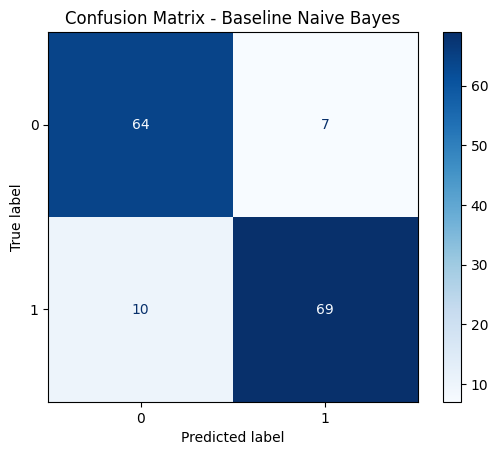

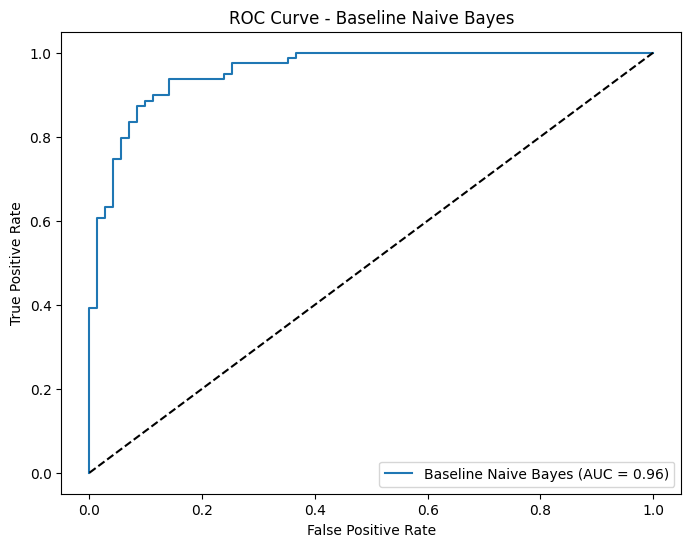

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Parameters for Naive Bayes:
{'var_smoothing': 1e-15}

Tuned Naive Bayes Model Evaluation:
Accuracy: 0.89
Precision: 0.91
Recall: 0.87
F1 Score: 0.89
AUC Score: 0.96
Confusion Matrix - Tuned Naive Bayes:


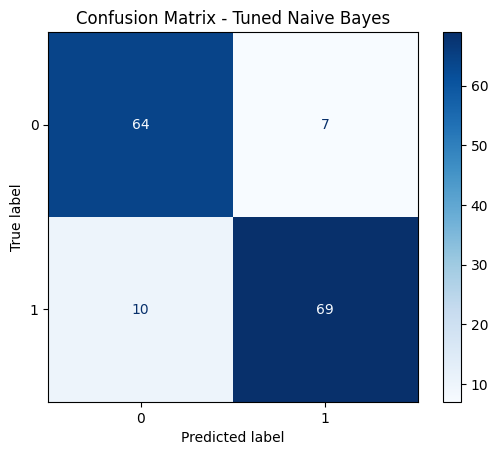

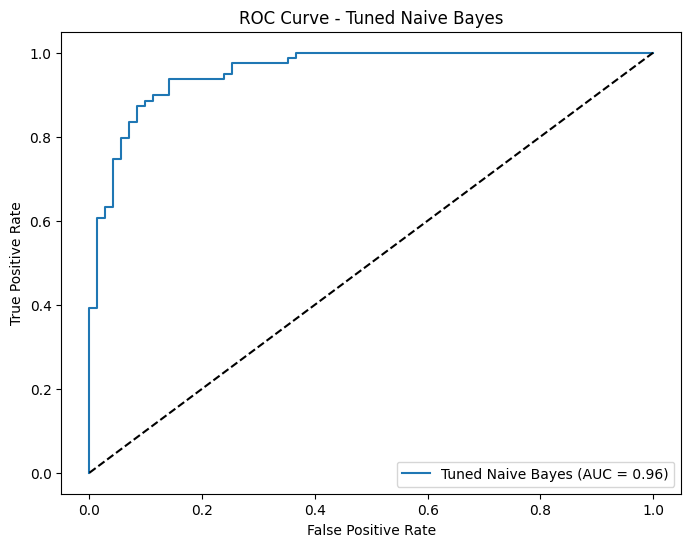

In [ ]:
# Naive Bayes

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay


# Initialise the baseline Naive Bayes model
nb_baseline = GaussianNB()

# Train the baseline model
nb_baseline.fit(X_train, y_train)

# Make predictions
y_pred_baseline = nb_baseline.predict(X_test)
y_proba_baseline = nb_baseline.predict_proba(X_test)[:, 1]

# Evaluate baseline Naive Bayes
print("Baseline Naive Bayes Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_baseline):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_baseline):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_baseline):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_baseline):.2f}")
print(f"AUC Score: {roc_auc_score(y_test, y_proba_baseline):.2f}")

# Confusion Matrix for baseline model
print("Confusion Matrix - Baseline Naive Bayes:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_baseline, cmap='Blues')
plt.title("Confusion Matrix - Baseline Naive Bayes")
plt.show()

# ROC Curve for baseline model
fpr_base, tpr_base, _ = roc_curve(y_test, y_proba_baseline)
plt.figure(figsize=(8, 6))
plt.plot(fpr_base, tpr_base, label=f"Baseline Naive Bayes (AUC = {roc_auc_score(y_test, y_proba_baseline):.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Baseline Naive Bayes")
plt.legend(loc="lower right")
plt.show()

# ----------------- Tuned Naive Bayes Model -----------------

# Hyperparameter tuning for Naive Bayes
param_grid = {'var_smoothing': [1e-15, 1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8]}

# GridSearchCV for tuning
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model and parameters
best_nb_model = grid_search.best_estimator_
print("Best Parameters for Naive Bayes:")
print(grid_search.best_params_)

# Predictions for tuned model
y_pred_tuned = best_nb_model.predict(X_test)
y_proba_tuned = best_nb_model.predict_proba(X_test)[:, 1]

# Evaluate tuned Naive Bayes
print("\nTuned Naive Bayes Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_tuned):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_tuned):.2f}")
print(f"AUC Score: {roc_auc_score(y_test, y_proba_tuned):.2f}")

# Confusion Matrix for tuned model
print("Confusion Matrix - Tuned Naive Bayes:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tuned, cmap='Blues')
plt.title("Confusion Matrix - Tuned Naive Bayes")
plt.show()

# ROC Curve for tuned model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_proba_tuned)
plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, label=f"Tuned Naive Bayes (AUC = {roc_auc_score(y_test, y_proba_tuned):.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned Naive Bayes")
plt.legend(loc="lower right")
plt.show()

Baseline Gradient Boosted Trees Model Evaluation:
Accuracy: 0.90
Precision: 0.94
Recall: 0.86
F1 Score: 0.90
AUC Score: 0.96

Classification Report - Baseline Gradient Boosted Trees:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        71
           1       0.94      0.86      0.90        79

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150

Confusion Matrix - Baseline Gradient Boosted Trees:


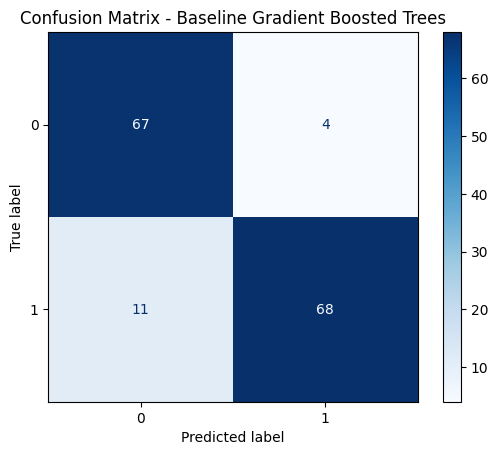

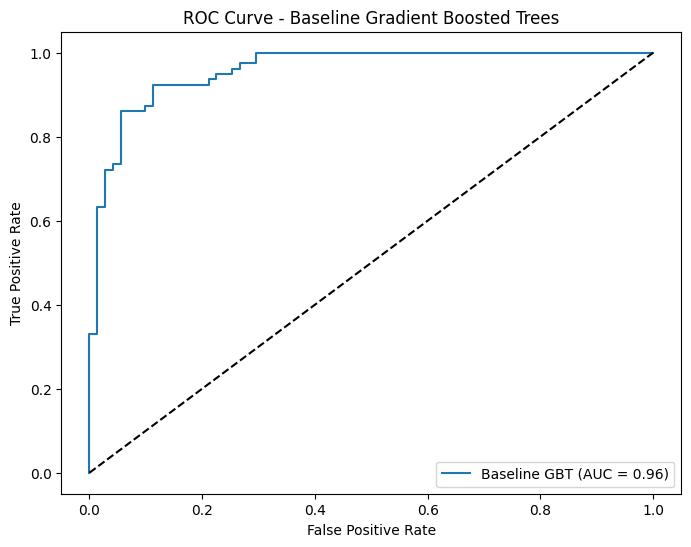

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters for Gradient Boosted Trees:
{'learning_rate': 0.2, 'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}

Tuned Gradient Boosted Trees Model Evaluation:
Accuracy: 0.89
Precision: 0.93
Recall: 0.86
F1 Score: 0.89
AUC Score: 0.94

Classification Report - Tuned Gradient Boosted Trees:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        71
           1       0.93      0.86      0.89        79

    accuracy                           0.89       150
   macro avg       0.89      0.90      0.89       150
weighted avg       0.90      0.89      0.89       150

Confusion Matrix - Tuned Gradient Boosted Trees:


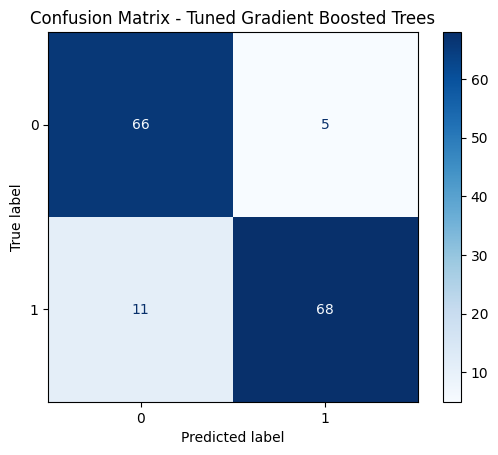

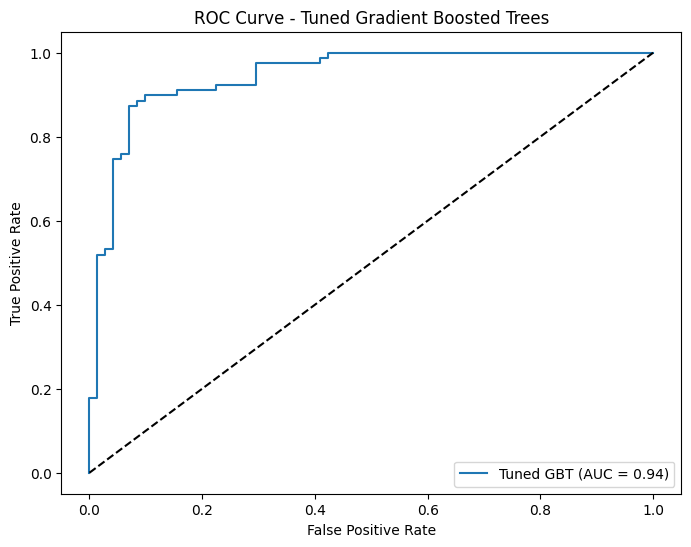

In [ ]:
#Gradient Boosted Trees

# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Baseline Gradient Boosted Trees Model
gb_baseline = GradientBoostingClassifier(random_state=42)
gb_baseline.fit(X_train, y_train)

# Predictions for baseline model
y_pred_baseline = gb_baseline.predict(X_test)
y_proba_baseline = gb_baseline.predict_proba(X_test)[:, 1]

# Evaluate baseline model
print("Baseline Gradient Boosted Trees Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_baseline):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_baseline):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_baseline):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_baseline):.2f}")
print(f"AUC Score: {roc_auc_score(y_test, y_proba_baseline):.2f}")

# Classification report
print("\nClassification Report - Baseline Gradient Boosted Trees:")
print(classification_report(y_test, y_pred_baseline))

# Confusion Matrix for baseline model
print("Confusion Matrix - Baseline Gradient Boosted Trees:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_baseline, cmap='Blues')
plt.title("Confusion Matrix - Baseline Gradient Boosted Trees")
plt.show()

# ROC Curve for baseline model
fpr_base, tpr_base, _ = roc_curve(y_test, y_proba_baseline)
plt.figure(figsize=(8, 6))
plt.plot(fpr_base, tpr_base, label=f"Baseline GBT (AUC = {roc_auc_score(y_test, y_proba_baseline):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Baseline Gradient Boosted Trees")
plt.legend(loc="lower right")
plt.show()

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size for weight updates
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'subsample': [0.8, 1.0],  # Fraction of samples used for fitting
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split a node
}

grid_search = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best model and parameters
best_gb_model = grid_search.best_estimator_
print("Best Parameters for Gradient Boosted Trees:")
print(grid_search.best_params_)

# Predictions for tuned model
y_pred_tuned = best_gb_model.predict(X_test)
y_proba_tuned = best_gb_model.predict_proba(X_test)[:, 1]

# Evaluate tuned model
print("\nTuned Gradient Boosted Trees Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_tuned):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_tuned):.2f}")
print(f"AUC Score: {roc_auc_score(y_test, y_proba_tuned):.2f}")

# Classification report
print("\nClassification Report - Tuned Gradient Boosted Trees:")
print(classification_report(y_test, y_pred_tuned))

# Confusion Matrix for tuned model
print("Confusion Matrix - Tuned Gradient Boosted Trees:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tuned, cmap='Blues')
plt.title("Confusion Matrix - Tuned Gradient Boosted Trees")
plt.show()

# ROC Curve for tuned model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_proba_tuned)
plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, label=f"Tuned GBT (AUC = {roc_auc_score(y_test, y_proba_tuned):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned Gradient Boosted Trees")
plt.legend(loc="lower right")
plt.show()


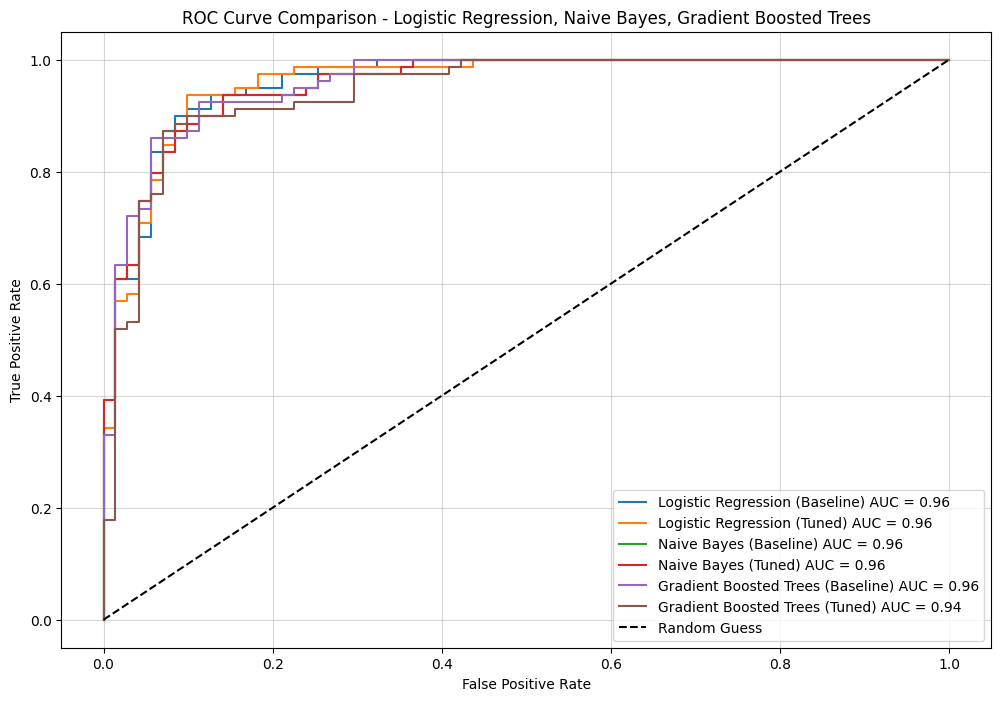

In [ ]:
# Logistic Regression
fpr_base_log, tpr_base_log, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
fpr_tuned_log, tpr_tuned_log, _ = roc_curve(y_test, best_log_reg.predict_proba(X_test)[:, 1])

# Naive Bayes
fpr_base_nb, tpr_base_nb, _ = roc_curve(y_test, nb_baseline.predict_proba(X_test)[:, 1])
fpr_tuned_nb, tpr_tuned_nb, _ = roc_curve(y_test, best_nb_model.predict_proba(X_test)[:, 1])

# Gradient Boosted Trees
fpr_base_gbt, tpr_base_gbt, _ = roc_curve(y_test, gb_baseline.predict_proba(X_test)[:, 1])
fpr_tuned_gbt, tpr_tuned_gbt, _ = roc_curve(y_test, best_gb_model.predict_proba(X_test)[:, 1])

# Combined ROC Curve Plot
plt.figure(figsize=(12, 8))

# Logistic Regression
plt.plot(fpr_base_log, tpr_base_log, label=f"Logistic Regression (Baseline) AUC = {roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]):.2f}")
plt.plot(fpr_tuned_log, tpr_tuned_log, label=f"Logistic Regression (Tuned) AUC = {roc_auc_score(y_test, best_log_reg.predict_proba(X_test)[:, 1]):.2f}")

# Naive Bayes
plt.plot(fpr_base_nb, tpr_base_nb, label=f"Naive Bayes (Baseline) AUC = {roc_auc_score(y_test, nb_baseline.predict_proba(X_test)[:, 1]):.2f}")
plt.plot(fpr_tuned_nb, tpr_tuned_nb, label=f"Naive Bayes (Tuned) AUC = {roc_auc_score(y_test, best_nb_model.predict_proba(X_test)[:, 1]):.2f}")

# Gradient Boosted Trees
plt.plot(fpr_base_gbt, tpr_base_gbt, label=f"Gradient Boosted Trees (Baseline) AUC = {roc_auc_score(y_test, gb_baseline.predict_proba(X_test)[:, 1]):.2f}")
plt.plot(fpr_tuned_gbt, tpr_tuned_gbt, label=f"Gradient Boosted Trees (Tuned) AUC = {roc_auc_score(y_test, best_gb_model.predict_proba(X_test)[:, 1]):.2f}")

# Random guessing line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Formatting the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - Logistic Regression, Naive Bayes, Gradient Boosted Trees")
plt.legend(loc="lower right")
plt.grid(alpha=0.5)
plt.show()


In [ ]:
#Input Classification (Logistic Regression - Tuned)
# Calculate minimum and maximum values for each feature in the dataset
feature_ranges = {
    'Age': (None, None),  # No range validation for Age
    'RestingBP': (data['RestingBP'].min(), data['RestingBP'].max()),
    'Cholesterol': (data['Cholesterol'].min(), data['Cholesterol'].max()),
    'FastingBS': (data['FastingBS'].min(), data['FastingBS'].max()),
    'MaxHR': (data['MaxHR'].min(), data['MaxHR'].max()),
    'Oldpeak': (data['Oldpeak'].min(), data['Oldpeak'].max())
}

print("Logistic Regression - Optimized Model")

def get_valid_input(prompt, feature_name):
    # Skip validation for Age
    if feature_name == 'Age':
        while True:
            try:
                return float(input(f"{prompt}: "))  # No range enforcement
            except ValueError:
                print("Invalid input! Please enter a numeric value.")
    else:
        # Validate for other features
        min_val, max_val = feature_ranges[feature_name]
        while True:
            try:
                value = float(input(f"{prompt} (Range: {min_val} - {max_val}): "))
                if min_val <= value <= max_val:
                    return value
                else:
                    print(f"Value out of range! Please enter a value between {min_val} and {max_val}.")
            except ValueError:
                print("Invalid input! Please enter a numeric value.")

# Function to input user data and predict heart disease risk using Logistic Regression
def predict_heart_disease(model, scaler, feature_names):
    print("\nEnter the following health parameters to predict heart disease risk:")
    Age = get_valid_input("Age", 'Age')
    RestingBP = get_valid_input("Resting Blood Pressure", 'RestingBP')
    Cholesterol = get_valid_input("Cholesterol", 'Cholesterol')
    FastingBS = int(input("Fasting Blood Sugar (1 if >120 mg/dl, 0 otherwise): "))
    MaxHR = get_valid_input("Maximum Heart Rate Achieved", 'MaxHR')
    Oldpeak = get_valid_input("ST depression induced by exercise relative to rest", 'Oldpeak')

    # Additional categorical features (based on dataset columns)
    Sex_M = int(input("Sex (1 for Male, 0 for Female): "))
    ChestPainType_ATA = int(input("Chest Pain Type (1 for Atypical Angina, 0 otherwise): "))
    ChestPainType_NAP = int(input("Chest Pain Type (1 for Non-Anginal Pain, 0 otherwise): "))
    ChestPainType_TA = int(input("Chest Pain Type (1 for Typical Angina, 0 otherwise): "))
    ExerciseAngina_Y = int(input("Exercise-Induced Angina (1 for Yes, 0 for No): "))
    ST_Slope_Flat = int(input("ST Slope (1 for Flat, 0 otherwise): "))
    ST_Slope_Up = int(input("ST Slope (1 for Up, 0 otherwise): "))

    # Create a template dataframe with all features set to 0
    user_data_dict = {feature: 0 for feature in feature_names}

    # Populate the user's input into the corresponding features
    user_data_dict.update({
        'Age': Age,
        'RestingBP': RestingBP,
        'Cholesterol': Cholesterol,
        'FastingBS': FastingBS,
        'MaxHR': MaxHR,
        'Oldpeak': Oldpeak,
        'Sex_M': Sex_M,
        'ChestPainType_ATA': ChestPainType_ATA,
        'ChestPainType_NAP': ChestPainType_NAP,
        'ChestPainType_TA': ChestPainType_TA,
        'ExerciseAngina_Y': ExerciseAngina_Y,
        'ST_Slope_Flat': ST_Slope_Flat,
        'ST_Slope_Up': ST_Slope_Up
    })

    # Convert the dictionary to a dataframe
    user_data_df = pd.DataFrame([user_data_dict])

    # Scale the input features
    user_data_scaled = scaler.transform(user_data_df)

    # Predict using the model
    prediction = model.predict(user_data_scaled)[0]
    prediction_proba = model.predict_proba(user_data_scaled)[0][1]

    # Output results
    print("\nPrediction Results:")
    if prediction == 1:
        print(f"The model predicts that the individual is at risk of heart disease.")
    else:
        print(f"The model predicts that the individual is NOT at risk of heart disease.")
    print(f"Prediction Probability (Risk): {prediction_proba:.2f}")

# Call the user input function with Logistic Regression model
predict_heart_disease(best_log_reg, scaler, X.columns)


Logistic Regression - Optimized Model

Enter the following health parameters to predict heart disease risk:
Age: 33
Resting Blood Pressure (Range: 92 - 200): 100
Cholesterol (Range: 85 - 603): 120
Fasting Blood Sugar (1 if >120 mg/dl, 0 otherwise): 1
Maximum Heart Rate Achieved (Range: 69 - 202): 150
ST depression induced by exercise relative to rest (Range: -0.1 - 6.2): 3
Sex (1 for Male, 0 for Female): 1
Chest Pain Type (1 for Atypical Angina, 0 otherwise): 1
Chest Pain Type (1 for Non-Anginal Pain, 0 otherwise): 0
Chest Pain Type (1 for Typical Angina, 0 otherwise): 0
Exercise-Induced Angina (1 for Yes, 0 for No): 0
ST Slope (1 for Flat, 0 otherwise): 0
ST Slope (1 for Up, 0 otherwise): 1

Prediction Results:
The model predicts that the individual is NOT at risk of heart disease.
Prediction Probability (Risk): 0.23


In [ ]:
#Input classification Gradient Boost Trees - Baseline
print("Gradient Boost Trees - Standard Model")

# Updated get_valid_input function
def get_valid_input(prompt, feature_name):
    # Skip validation for Age
    if feature_name == 'Age':
        while True:
            try:
                return float(input(f"{prompt}: "))  # No range enforcement
            except ValueError:
                print("Invalid input! Please enter a numeric value.")
    else:
        # Validate for other features
        min_val, max_val = feature_ranges[feature_name]
        while True:
            try:
                value = float(input(f"{prompt} (Range: {min_val} - {max_val}): "))
                if min_val <= value <= max_val:
                    return value
                else:
                    print(f"Value out of range! Please enter a value between {min_val} and {max_val}.")
            except ValueError:
                print("Invalid input! Please enter a numeric value.")

# Function to input user data and predict heart disease risk using Gradient Boosted Trees (baseline)
def predict_heart_disease_gbt(model, scaler, feature_names):
    print("\nEnter the following health parameters to predict heart disease risk:")
    Age = get_valid_input("Age", 'Age')
    RestingBP = get_valid_input("Resting Blood Pressure", 'RestingBP')
    Cholesterol = get_valid_input("Cholesterol", 'Cholesterol')
    FastingBS = int(input("Fasting Blood Sugar (1 if >120 mg/dl, 0 otherwise): "))
    MaxHR = get_valid_input("Maximum Heart Rate Achieved", 'MaxHR')
    Oldpeak = get_valid_input("ST depression induced by exercise relative to rest", 'Oldpeak')

    # Additional categorical features (based on dataset columns)
    Sex_M = int(input("Sex (1 for Male, 0 for Female): "))
    ChestPainType_ATA = int(input("Chest Pain Type (1 for Atypical Angina, 0 otherwise): "))
    ChestPainType_NAP = int(input("Chest Pain Type (1 for Non-Anginal Pain, 0 otherwise): "))
    ChestPainType_TA = int(input("Chest Pain Type (1 for Typical Angina, 0 otherwise): "))
    ExerciseAngina_Y = int(input("Exercise-Induced Angina (1 for Yes, 0 for No): "))
    ST_Slope_Flat = int(input("ST Slope (1 for Flat, 0 otherwise): "))
    ST_Slope_Up = int(input("ST Slope (1 for Up, 0 otherwise): "))

    # Create a template dataframe with all features set to 0
    user_data_dict = {feature: 0 for feature in feature_names}

    # Populate the user's input into the corresponding features
    user_data_dict.update({
        'Age': Age,
        'RestingBP': RestingBP,
        'Cholesterol': Cholesterol,
        'FastingBS': FastingBS,
        'MaxHR': MaxHR,
        'Oldpeak': Oldpeak,
        'Sex_M': Sex_M,
        'ChestPainType_ATA': ChestPainType_ATA,
        'ChestPainType_NAP': ChestPainType_NAP,
        'ChestPainType_TA': ChestPainType_TA,
        'ExerciseAngina_Y': ExerciseAngina_Y,
        'ST_Slope_Flat': ST_Slope_Flat,
        'ST_Slope_Up': ST_Slope_Up
    })

    # Convert the dictionary to a dataframe
    user_data_df = pd.DataFrame([user_data_dict])

    # Scale the input features
    user_data_scaled = scaler.transform(user_data_df)

    # Predict using the model
    prediction = model.predict(user_data_scaled)[0]
    prediction_proba = model.predict_proba(user_data_scaled)[0][1]

    # Output results
    print("\nPrediction Results:")
    if prediction == 1:
        print(f"The model predicts that the individual is at risk of heart disease.")
    else:
        print(f"The model predicts that the individual is NOT at risk of heart disease.")
    print(f"Prediction Probability (Risk): {prediction_proba:.2f}")

# Call the user input function with the Gradient Boosted Trees baseline model
predict_heart_disease_gbt(gb_baseline, scaler, X.columns)


Gradient Boost Trees - Standard Model

Enter the following health parameters to predict heart disease risk:
Age: 33
Resting Blood Pressure (Range: 92 - 200): 100
Cholesterol (Range: 85 - 603): 120
Fasting Blood Sugar (1 if >120 mg/dl, 0 otherwise): 1
Maximum Heart Rate Achieved (Range: 69 - 202): 150
ST depression induced by exercise relative to rest (Range: -0.1 - 6.2): 3
Sex (1 for Male, 0 for Female): 1
Chest Pain Type (1 for Atypical Angina, 0 otherwise): 1
Chest Pain Type (1 for Non-Anginal Pain, 0 otherwise): 0
Chest Pain Type (1 for Typical Angina, 0 otherwise): 0
Exercise-Induced Angina (1 for Yes, 0 for No): 0
ST Slope (1 for Flat, 0 otherwise): 0
ST Slope (1 for Up, 0 otherwise): 1

Prediction Results:
The model predicts that the individual is NOT at risk of heart disease.
Prediction Probability (Risk): 0.24
